AD: Recep

SOYAD: Çalışkan

OKUL NUMARASI: 2312721004

GİTHUB REPO BAĞLANTISI: https://github.com/RecepClskn/genetik_optimizasyonu.git

In [470]:
import numpy as np
import matplotlib.pyplot as plt

# Genel Ayarlar
populasyon_buyuklugu = 100
max_iterasyon_sayisi = 150
caprazlama_orani = 0.8
mutasyon_orani = 0.05
turnuva_boyutu = 3

# Değişken Sınırları
SINIR = np.array([
    [0, 50],     # Gübre (x1)
    [0, 100]     # Sulama (x2)
])

In [471]:
# Amac Fonksiyonumuz

def hedef_fonksiyon(gubre, su):
    return 10*gubre + 6*su - 0.5*gubre**2 - 0.2*su**2

# Fitness Hesabı için Fonksiyon
def uygunluk_degeri_fonksiyonu(birey):
    gubre, su = birey
    ceza = 0

    # Kısıt 1: Toprak doygunluğu
    if gubre + 0.1 * su > 60:
        ceza += (gubre + 0.1 * su - 60) * 50

    # Kısıt 2: Minimum su ihtiyacı
    if su < 20:
        ceza += (20 - su) * 50

    return hedef_fonksiyon(gubre, su) - ceza


In [472]:
# Popülasyon (Başlangıç için)
def baslangic_populasyonu(adet):
    bireyler = np.zeros((adet, 2))
    bireyler[:, 0] = np.random.uniform(SINIR[0, 0], SINIR[0, 1], adet)
    bireyler[:, 1] = np.random.uniform(SINIR[1, 0], SINIR[1, 1], adet)
    return bireyler

In [473]:
# Turnuva Hesabı (Ebeveynlerin skorlarını karşılaştırır ve en iyi skorları ekler.)
def ebeveyn_secimi(cozumler, skorlar):
    secilenler = np.random.randint(0, len(cozumler), turnuva_boyutu)
    en_iyi = secilenler[0]

    for i in secilenler:
        if skorlar[i] > skorlar[en_iyi]:
            en_iyi = i

    return cozumler[en_iyi]

In [474]:
# Çaprazlama (İki ebeveynden iki çocuk üretir. Random bir sayı üretir ve bu sayının orandan büyük veya küçük olmasına göre çaprazlama yapar.Çaprazlama olmazsa ebeveynlerde değişim olmaz.)
def birlestir(a, b):
    if np.random.rand() < caprazlama_orani:
        w = np.random.rand()
        c1 = w * a + (1 - w) * b
        c2 = (1 - w) * a + w * b
        return c1, c2
    return a.copy(), b.copy()

# Mutasyon (Mutasyon ile ufak değişiklikler yapılır. Daha sonra sınırların dışına çıkıp çıkmadığı kontrol edilerek devam edilir.)
def degistir(birey):
    for i in range(2):
        if np.random.rand() < mutasyon_orani:
            sigma = (SINIR[i, 1] - SINIR[i, 0]) * 0.1
            birey[i] += np.random.normal(0, sigma)
            birey[i] = np.clip(birey[i], SINIR[i, 0], SINIR[i, 1])
    return birey


In [475]:
# Genetik Algoritma (En iyi birey ve en iyi skorları hesaplayarak her bir iterasyonda uygun fitness değerleri ile grafiğin iyileştirilmesini sağlar.)
def genetik_optimizasyon():
    cozumler = baslangic_populasyonu(populasyon_buyuklugu)
    en_iyi_skorlar = []

    en_iyi_birey = None
    en_iyi_skor = -np.inf

    print("Optimizasyon süreci başlatıldı...\n")

    for adim in range(max_iterasyon_sayisi):
        skorlar = np.array([uygunluk_degeri_fonksiyonu(b) for b in cozumler])

        idx = np.argmax(skorlar)
        if skorlar[idx] > en_iyi_skor:
            en_iyi_skor = skorlar[idx]
            en_iyi_birey = cozumler[idx].copy()

        en_iyi_skorlar.append(en_iyi_skor)

        # Elitizm (En iyi sonuçları kaydederek nesilin kaybolmasını önler. Popülasyon bitene kadar devam eder. Çaprazlama ve mutasyon ile yeni nesiller oluşturulur. Değişimler yapılır. Her 20 adımda bir ekrana yazdırarak hata kontrolü sağlar.)
        yeni_cozumler = [en_iyi_birey.copy()]

        while len(yeni_cozumler) < populasyon_buyuklugu:
            p1 = ebeveyn_secimi(cozumler, skorlar)
            p2 = ebeveyn_secimi(cozumler, skorlar)

            y1, y2 = birlestir(p1, p2)
            yeni_cozumler.append(degistir(y1))

            if len(yeni_cozumler) < populasyon_buyuklugu:
                yeni_cozumler.append(degistir(y2))

        cozumler = np.array(yeni_cozumler)

        if (adim + 1) % 20 == 0:
            print(f"Adım {adim+1}: En iyi uygunluk = {en_iyi_skor:.4f}")

    return en_iyi_birey, en_iyi_skorlar

Optimizasyon süreci başlatıldı...

Adım 20: En iyi uygunluk = 89.3922
Adım 40: En iyi uygunluk = 89.4059
Adım 60: En iyi uygunluk = 89.4059
Adım 80: En iyi uygunluk = 89.5496
Adım 100: En iyi uygunluk = 89.5496
Adım 120: En iyi uygunluk = 89.5496
Adım 140: En iyi uygunluk = 89.6906

--- OPTİMUM ÇÖZÜM BİÇİMİ ---
Gübre Miktarı : 10.0000 kg/da
Sulama Miktarı: 20.1524 L/da
Maksimum Alınabilecek Verim: 89.6906

--- KISIT KONTROLÜ ---
Toprak Sınırları: 12.0152 ≤ 60
Minimum Su  : 20.1524 ≥ 20


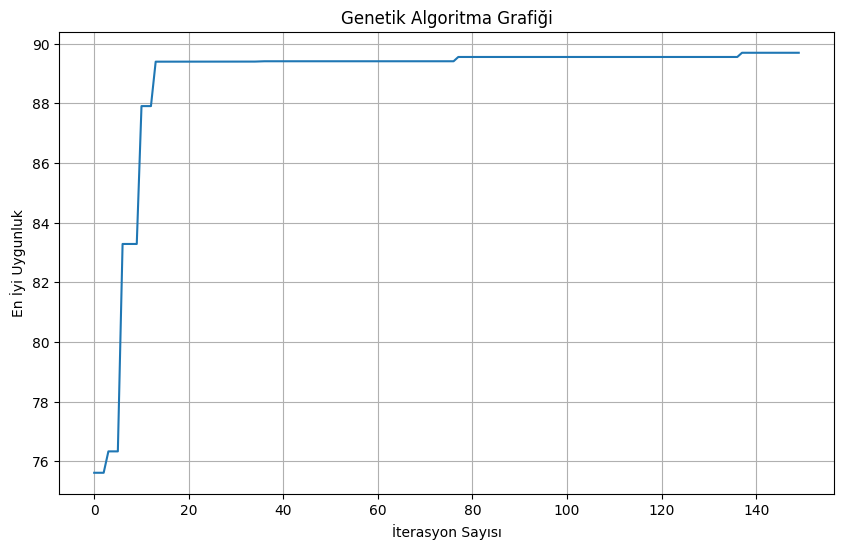

In [476]:
# Sonuç Kısmı (Optimum skorları ve skor geçmişlerini kaydeder. Daha sonra tüm değerleri ekrana yazdırırız.)
optimum, skor_gecmisi = genetik_optimizasyon()

gubre_opt, su_opt = optimum
verim_opt = hedef_fonksiyon(gubre_opt, su_opt)

print("\n--- OPTİMUM ÇÖZÜM BİÇİMİ ---")
print(f"Gübre Miktarı : {gubre_opt:.4f} kg/da")
print(f"Sulama Miktarı: {su_opt:.4f} L/da")
print(f"Maksimum Alınabilecek Verim: {verim_opt:.4f}")

print("\n--- KISIT KONTROLÜ ---")
print(f"Toprak Sınırları: {gubre_opt + 0.1*su_opt:.4f} ≤ 60")
print(f"Minimum Su  : {su_opt:.4f} ≥ 20")

# GRAFİK
plt.figure(figsize=(10, 6))
plt.plot(skor_gecmisi)
plt.xlabel("İterasyon Sayısı")
plt.ylabel("En İyi Uygunluk")
plt.title("Genetik Algoritma Grafiği")
plt.grid(True)
plt.show()
